### Manahil Fatima Anwar
### 20K-0134
### BAI-7A
### CV Lab 05 - Class Tasks

#### Task 01

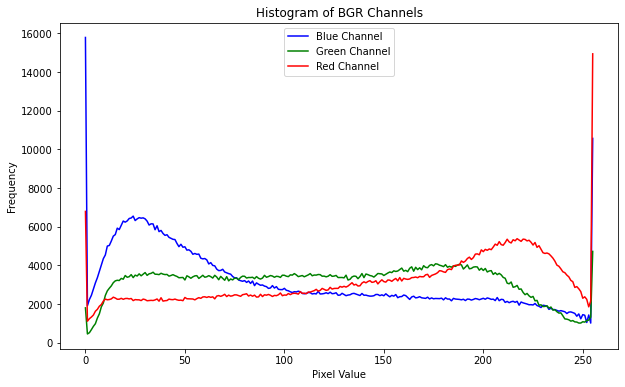

In [1]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("garbage.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(img)

r = cv2.calcHist([img], [0], None, [256], [0, 256])
g = cv2.calcHist([img], [1], None, [256], [0, 256])
b = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.title('Histogram of BGR Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(b, color='blue', label='Blue Channel')
plt.plot(g, color='green', label='Green Channel')
plt.plot(r, color='red', label='Red Channel')
plt.legend(loc='upper center')

plt.show()

#### Task 02

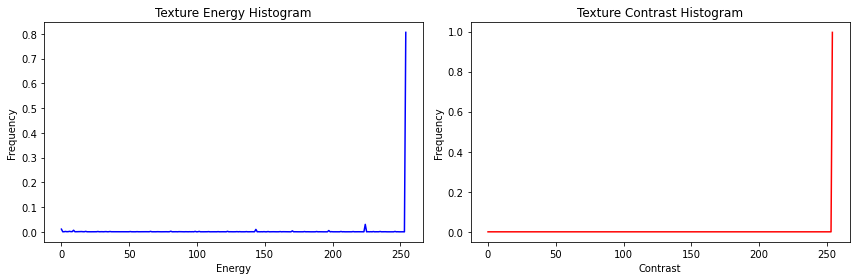

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read an image (grayscale)
image = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)
# Define the neighborhood size (e.g., 3x3 window)
neighborhood_size = 3
# Calculate texture energy and contrast using OpenCV filter2D
energy = cv2.filter2D(image ** 2, -1, np.ones((neighborhood_size, neighborhood_size)))
contrast = cv2.filter2D(image, -1, np.ones((neighborhood_size, neighborhood_size)))
# Compute histograms for texture energy and contrast
energy_histogram, energy_bins = np.histogram(energy, bins=256, range=(0, energy.max()))
contrast_histogram, contrast_bins = np.histogram(contrast, bins=256, range=(0, contrast.max()))
# Normalize histograms (optional)
energy_histogram = energy_histogram / energy_histogram.sum()
contrast_histogram = contrast_histogram / contrast_histogram.sum()
# Display the histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(energy_bins[:-1], energy_histogram, color="b")

plt.title("Texture Energy Histogram")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.plot(contrast_bins[:-1], contrast_histogram, color="r")
plt.title("Texture Contrast Histogram")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# You can use the computed histograms as feature vectors for texture analysis.

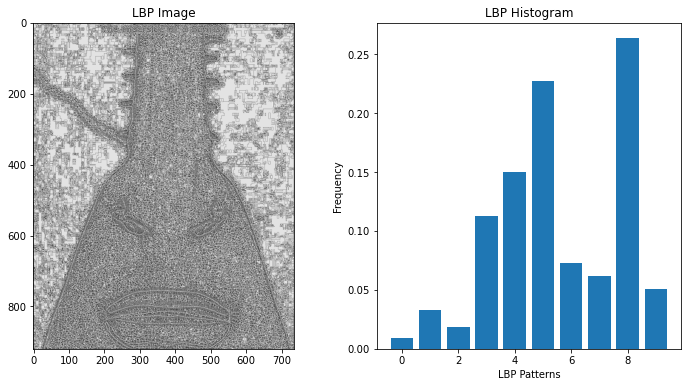

LBP Feature Vector:
[0.00930346 0.03297545 0.01863502 0.11253327 0.15014789 0.22729518
 0.07282165 0.06211328 0.26354185 0.05063295]


In [3]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read an image (grayscale)
image = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)
# Compute LBP features
radius = 1 # Radius of the circular neighborhood
n_points = 8 * radius # Number of neighboring pixels to consider
lbp_image = feature.local_binary_pattern(image, n_points, radius, method="uniform")
# Calculate the LBP histogram
hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
# Normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)
# Display the LBP image and histogram
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(lbp_image, cmap="gray")
plt.title("LBP Image")

plt.subplot(122)
plt.bar(range(0, n_points + 2), hist)
plt.title("LBP Histogram")
plt.xlabel("LBP Patterns")
plt.ylabel("Frequency")
plt.show()
# Print the LBP feature vector
print("LBP Feature Vector:")
print(hist)

1. **Texture Energy and Texture Contrast using Filter2D**
    - **How it works:**
        - Texture energy measures local variations in pixel values within a neighborhood by summing squared pixel values.
        - Texture contrast quantifies differences in pixel values within the same neighborhood by summing absolute differences from the mean.
    - **Suitability for Textures:**
        - Energy for fine-grained materials like fabric or grass.
        - Contrast for materials with sharp edges or pronounced patterns like metal or wood grain.
    - **Advantages:**
        - Simple implementation using filter operations.
        - Provides meaningful information about local texture characteristics.
        - Works well for a wide range of textures.
    - **Limitations:**
        - Sensitive to noise.
        - Proper neighborhood size selection is crucial.
        - May not capture complex patterns.


2. **Local Binary Pattern (LBP)**
    - **How it works:**
        - LBP encodes relationships between a central pixel and its neighbors by converting neighborhoods into binary patterns.
        - The LBP histogram represents the frequency of different binary patterns.
    - **Suitability for Textures:**
        - Effective for various textures, including irregular patterns.
    - **Advantages:**
        - Robust to illumination changes and noise.
        - Invariant to monotonic gray scale changes.
        - Captures both simple and complex texture patterns.
    - **Limitations:**
        - May not capture pattern directionality.
        - Parameters (radius, n_points) require tuning.
        - High-dimensional histograms for large neighborhoods.